In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end= '2019-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439791


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938217
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325798
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298737
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721893
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245941


In [4]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439791


In [5]:
df=df.drop(['Date', 'Adj Close'], axis =1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


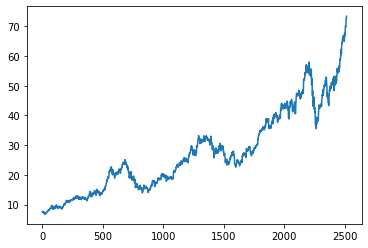

In [6]:
 plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

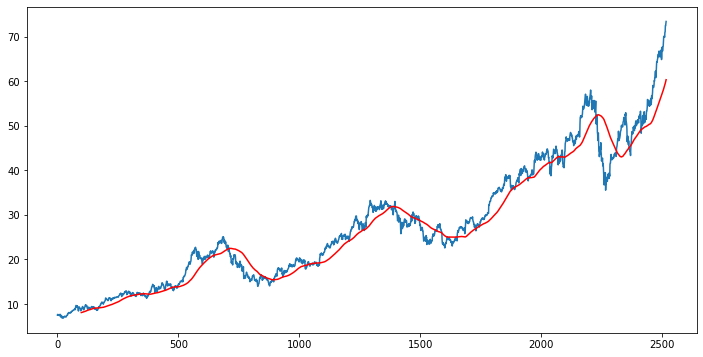

In [9]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'red')

No handles with labels found to put in legend.


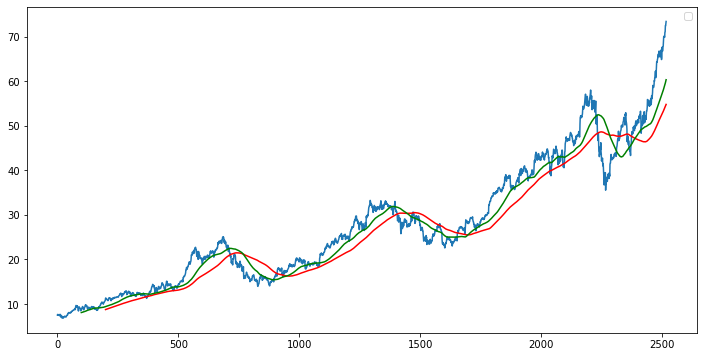

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma200 , 'red')
plt.plot(ma100 , 'g')
plt.legend()

In [14]:
df.shape

(2517, 5)

In [15]:
# splitting data into training and testing

data_training = pd .DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd. DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [16]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
# divide data into x-train and y-train
# for 1st 100 days x_train 101th day y_train(predictive)
#after each state it will inc. and forget the 1st value and add an y_train value
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [21]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units =50, activation = 'relu' , return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation = 'relu' , return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation = 'relu' , return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation = 'relu' , return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
52/52 [==============================] - 19s 288ms/step - loss: 0.1179
Epoch 2/50
52/52 [==============================] - 15s 289ms/step - loss: 0.0760
Epoch 3/50
52/52 [==============================] - 15s 292ms/step - loss: 0.0735
Epoch 4/50
52/52 [==============================] - 15s 281ms/step - loss: 0.0717
Epoch 5/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0709
Epoch 6/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0700
Epoch 7/50
52/52 [==============================] - 15s 279ms/step - loss: 0.0695
Epoch 8/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0686
Epoch 9/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0685
Epoch 10/50
52/52 [==============================] - 15s 280ms/step - loss: 0.0686
Epoch 11/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0674
Epoch 12/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0673
Epoch 13/50
5

In [26]:
model.save('keras_model.h5')

In [39]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [40]:
data_training.tail()

,Close
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001
1760,29.190001


In [41]:
past_100_days = data_training.tail(100)

In [42]:
final_df = past_100_days.append(data_testing, ignore_index =True)

In [43]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [48]:
input_data.shape

(856, 1)

In [50]:
x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [52]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [60]:
#making Predictions

y_prediction = model.predict(x_test)
y_prediction.shape

(756, 100, 1)

In [61]:
y_test

array([ 161.94209266,  151.10622272,  155.03572001,  153.48768668,
        160.51315978,  175.99294803,  188.85298058,  190.28191346,
        197.90270713,  191.9489564 ,  189.44839199,  200.8795825 ,
        200.76048205,  198.25991764,  200.8795825 ,  201.83220442,
        200.52237199,  223.26565256,  223.98016442,  224.09917402,
        220.28877719,  216.95469131,  305.07022036,  302.4505555 ,
        308.99971764,  323.40769267,  338.17305991,  344.24582025,
        348.77072895,  345.19844217,  359.13019708,  379.73030545,
        385.56486488,  383.65980273,  388.06552014,  399.7348207 ,
        404.61693991,  397.71056725,  399.25860059,  402.47349517,
        403.18809788,  436.52895664,  426.64589031,  436.40994703,
        431.17061731,  433.31406206,  427.12211042,  423.31162274,
        428.78915336,  429.50357438,  427.00310082,  444.50714251,
        447.24581697,  438.91060229,  456.41464398,  437.12436805,
        455.93824217,  449.98449144,  446.65040556,  449.50827

In [62]:
y_prediction

array([[[0.49512422],
        [0.5212314 ],
        [0.5232997 ],
        ...,
        [0.5119724 ],
        [0.5119778 ],
        [0.5119829 ]],

       [[0.4951363 ],
        [0.5212401 ],
        [0.5233054 ],
        ...,
        [0.5119778 ],
        [0.5119829 ],
        [0.5119878 ]],

       [[0.4951141 ],
        [0.5212233 ],
        [0.5232933 ],
        ...,
        [0.5119829 ],
        [0.5119878 ],
        [0.5119923 ]],

       ...,

       [[0.4978117 ],
        [0.52335113],
        [0.52504945],
        ...,
        [0.5208723 ],
        [0.5209197 ],
        [0.52096945]],

       [[0.4978496 ],
        [0.5233892 ],
        [0.5250843 ],
        ...,
        [0.5209197 ],
        [0.52096945],
        [0.52102196]],

       [[0.49793112],
        [0.5234519 ],
        [0.5251297 ],
        ...,
        [0.52096945],
        [0.52102196],
        [0.52107704]]], dtype=float32)

In [63]:
scaler.scale_

array([0.02099517])

In [58]:
scale_factor = 1/0.02099517
y_prediction = y_prediction * scale_factor
y_test =y_test*scale_factor

ValueError: x and y can be no greater than 2D, but have shapes (756,) and (756, 100, 1)

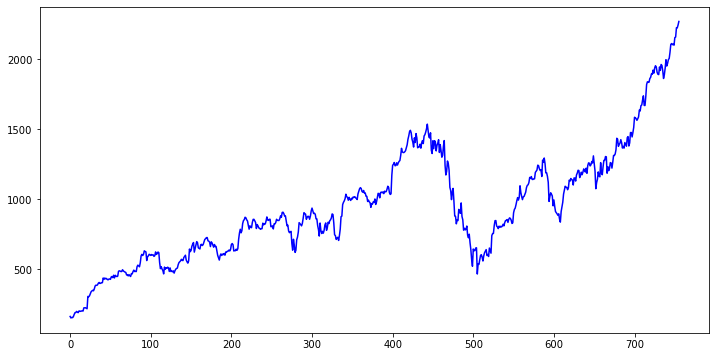

In [67]:
from keras.layers import Dense, LSTM
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label ='Original Price')
plt.plot(y_prediction, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [68]:
from keras.models import load_model
import streamlit as st

2022-04-20 12:41:32.918 
  command:

    streamlit run C:\Users\garima saha\anaconda3.1\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [72]:
start = '2010-01-01'
end= '2019-12-31'
st.title('Stock trend prediction')
user_input = st.text_input('enter stock ticker', 'AAPL')
df= data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451719
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [74]:
#Describing data
st.subheader('Data from 2010-2019')
st.write(df.describe())

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

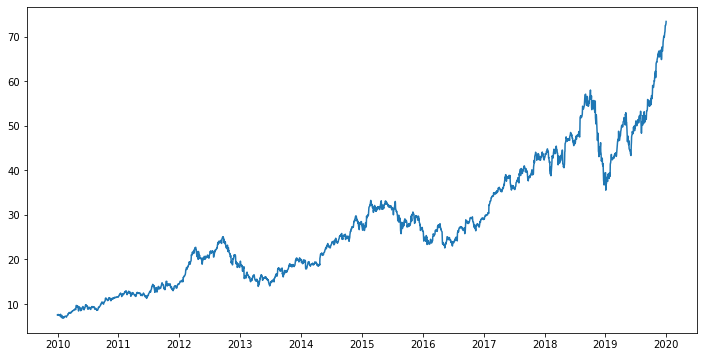

In [76]:
st.subheader('losing price vs time chart')
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)
st.pyplot(fig)